<a href="https://colab.research.google.com/github/claredavies/DataScienceCoursework/blob/master/StudentGradePredictionCoursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
import io
from google.colab import files

In [71]:
data_to_load_students = files.upload()
std = pd.read_csv(io.BytesIO(data_to_load_students['DataCoursework2.csv']))
std.head(5)

Saving DataCoursework2.csv to DataCoursework2 (13).csv


,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,Week1_Stat0,Week1_Stat1,Week1_Stat2,Week1_Stat3,Week2_Stat0,Week2_Stat1,Week2_Stat2,Week2_Stat3,Week3_Stat0,Week3_Stat1,Week3_Stat2,Week3_Stat3,Week4_Stat0,Week4_Stat1,Week4_Stat2,Week4_Stat3,Week5_Stat0,Week5_Stat1,Week5_Stat2,Week5_Stat3,Week6_Stat0,Week6_Stat1,Week6_Stat2,Week6_Stat3,Week7_Stat0,Week7_Stat1,Week7_Stat2,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,ML-2020-1,5.00,15.0,5,16.09,5.00,21.88,5.0,5.00,5.0,82.97,0,0,0,0,7,30,1,0,30,4,0,0,14,39,2,0,24,6,1,0,28,30,2,0,2,0,1,0,5,4,0,4,8,6,1,0,4
1,ML-2020-2,3.33,15.0,5,17.83,5.00,22.27,5.0,4.00,5.0,82.43,8,0,0,0,61,10,3,8,100,4,4,3,130,16,1,4,48,19,5,5,57,22,2,4,31,9,0,8,5,2,0,0,25,3,2,5,4
2,ML-2020-3,1.67,13.0,5,15.22,5.00,27.05,2.5,5.00,5.0,79.44,4,0,0,0,19,10,3,3,25,4,0,2,50,19,2,2,28,6,0,2,14,20,2,0,12,4,0,0,8,2,0,0,9,0,1,0,3
3,ML-2020-4,2.50,14.0,5,10.00,5.00,31.02,5.0,3.13,5.0,80.65,12,0,0,1,30,10,1,6,79,4,2,2,240,27,2,1,47,4,3,1,99,19,4,0,29,4,5,4,10,0,0,0,7,6,0,0,3
4,ML-2020-6,0.00,15.0,5,12.17,4.93,15.91,5.0,4.67,5.0,67.68,6,0,0,0,0,0,0,0,27,5,0,0,6,15,1,0,32,12,0,8,22,18,1,2,43,4,3,6,8,5,1,1,5,3,1,0,2


In [72]:
std = std.drop(['ID'],axis=1)

std['Week1_Stat'] = (std['Week1_Stat0'] + std['Week1_Stat1'] + std['Week1_Stat2'] + std['Week1_Stat3'])
std['Week2_Stat'] = (std['Week2_Stat0'] + std['Week2_Stat1'] + std['Week2_Stat2'] + std['Week2_Stat3'])
std['Week3_Stat'] = (std['Week3_Stat0'] + std['Week3_Stat1'] + std['Week3_Stat2'] + std['Week3_Stat3'])
std['Week4_Stat'] = (std['Week4_Stat0'] + std['Week4_Stat1'] + std['Week4_Stat2'] + std['Week4_Stat3'])
std['Week5_Stat'] = (std['Week5_Stat0'] + std['Week5_Stat1'] + std['Week5_Stat2'] + std['Week5_Stat3'])
std['Week6_Stat'] = (std['Week6_Stat0'] + std['Week6_Stat1'] + std['Week6_Stat2'] + std['Week6_Stat3'])
std['Week7_Stat'] = (std['Week7_Stat0'] + std['Week7_Stat1'] + std['Week7_Stat2'] + std['Week7_Stat3'])
std['Week8_Stat'] = (std['Week8_Stat0'] + std['Week8_Stat1'] + std['Week8_Stat2'] + std['Week8_Stat3'])
std['Week9_Stat'] = (std['Week9_Stat0'] + std['Week9_Stat1'] + std['Week9_Stat2'] + std['Week9_Stat3'])

std['OverallStat'] = std['Week1_Stat'] + std['Week2_Stat'] + std['Week3_Stat'] + std['Week4_Stat'] + std['Week5_Stat'] + std['Week6_Stat'] + std['Week7_Stat']  + std['Week8_Stat'] + std['Week9_Stat']
std['OverallStat0'] = std['Week1_Stat0'] + std['Week2_Stat0'] + std['Week3_Stat0'] + std['Week4_Stat0'] + std['Week5_Stat0'] + std['Week6_Stat0'] + std['Week7_Stat0']  + std['Week8_Stat0'] + std['Week9_Stat0']
std['OverallStat1'] = std['Week1_Stat1'] + std['Week2_Stat1'] + std['Week3_Stat1'] + std['Week4_Stat1'] + std['Week5_Stat1'] + std['Week6_Stat1'] + std['Week7_Stat1']  + std['Week8_Stat1'] + std['Week9_Stat1']
std['OverallStat2'] = std['Week1_Stat2'] + std['Week2_Stat2'] + std['Week3_Stat2'] + std['Week4_Stat2'] + std['Week5_Stat2'] + std['Week6_Stat2'] + std['Week7_Stat2']  + std['Week8_Stat2'] + std['Week9_Stat2']
std['OverallStat3'] = std['Week1_Stat3'] + std['Week2_Stat3'] + std['Week3_Stat3'] + std['Week4_Stat3'] + std['Week5_Stat3'] + std['Week6_Stat3'] + std['Week7_Stat3']  + std['Week8_Stat3'] + std['Week9_Stat3']

# std.drop(std.iloc[:, 10:46], inplace = True, axis = 1)
std.head(20)

,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,Week1_Stat0,Week1_Stat1,Week1_Stat2,Week1_Stat3,Week2_Stat0,Week2_Stat1,Week2_Stat2,Week2_Stat3,Week3_Stat0,Week3_Stat1,Week3_Stat2,Week3_Stat3,Week4_Stat0,Week4_Stat1,Week4_Stat2,Week4_Stat3,Week5_Stat0,Week5_Stat1,Week5_Stat2,Week5_Stat3,Week6_Stat0,Week6_Stat1,Week6_Stat2,Week6_Stat3,Week7_Stat0,Week7_Stat1,Week7_Stat2,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade,Week1_Stat,Week2_Stat,Week3_Stat,Week4_Stat,Week5_Stat,Week6_Stat,Week7_Stat,Week8_Stat,Week9_Stat,OverallStat,OverallStat0,OverallStat1,OverallStat2,OverallStat3
0,5.00,15.0,5,16.09,5.00,21.88,5.0,5.00,5.0,82.97,0,0,0,0,7,30,1,0,30,4,0,0,14,39,2,0,24,6,1,0,28,30,2,0,2,0,1,0,5,4,0,4,8,6,1,0,4,0,38,34,55,31,60,3,13,15,249,118,119,8,4
1,3.33,15.0,5,17.83,5.00,22.27,5.0,4.00,5.0,82.43,8,0,0,0,61,10,3,8,100,4,4,3,130,16,1,4,48,19,5,5,57,22,2,4,31,9,0,8,5,2,0,0,25,3,2,5,4,8,82,111,151,77,85,48,7,35,604,465,85,17,37
2,1.67,13.0,5,15.22,5.00,27.05,2.5,5.00,5.0,79.44,4,0,0,0,19,10,3,3,25,4,0,2,50,19,2,2,28,6,0,2,14,20,2,0,12,4,0,0,8,2,0,0,9,0,1,0,3,4,35,31,73,36,36,16,10,10,251,169,65,8,9
3,2.50,14.0,5,10.00,5.00,31.02,5.0,3.13,5.0,80.65,12,0,0,1,30,10,1,6,79,4,2,2,240,27,2,1,47,4,3,1,99,19,4,0,29,4,5,4,10,0,0,0,7,6,0,0,3,13,47,87,270,55,122,42,10,13,659,553,74,17,15
4,0.00,15.0,5,12.17,4.93,15.91,5.0,4.67,5.0,67.68,6,0,0,0,0,0,0,0,27,5,0,0,6,15,1,0,32,12,0,8,22,18,1,2,43,4,3,6,8,5,1,1,5,3,1,0,2,6,0,32,22,52,43,56,15,9,235,149,62,7,17
5,3.33,14.0,5,14.78,5.00,15.51,5.0,4.67,4.5,71.79,12,0,2,1,35,12,2,6,50,0,0,4,113,21,1,3,32,5,1,1,71,21,1,1,33,9,0,3,12,0,0,0,7,2,0,0,3,15,55,54,138,39,94,45,12,9,461,365,70,7,19
6,0.00,0.0,0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,2,2,0,0,0
7,5.00,15.0,5,20.00,5.00,35.00,5.0,4.71,5.0,99.71,19,0,2,2,16,10,2,0,80,9,2,4,41,14,3,2,62,11,0,0,43,19,1,0,47,9,3,3,21,12,1,0,15,0,1,0,5,23,28,95,60,73,63,62,34,16,454,344,84,15,11
8,0.00,13.0,5,20.00,5.00,34.60,5.0,2.71,0.0,85.31,0,0,0,0,3,0,0,1,51,4,4,5,17,0,0,0,32,17,1,0,9,2,0,0,29,4,0,0,14,0,0,0,12,2,0,0,4,0,4,64,17,50,11,33,14,14,207,167,29,5,6
9,5.00,12.0,5,12.17,5.00,24.66,5.0,4.67,5.0,78.50,3,0,0,0,11,20,1,0,38,4,0,1,27,21,1,1,23,5,0,1,57,41,4,0,24,5,2,2,6,0,0,0,23,9,5,0,3,3,32,43,50,29,102,33,6,37,335,212,105,13,5


Week3_Stat2   -0.162950
Week1_Stat2   -0.129440
Week8_Stat2    0.009186
Week1_Stat3    0.072546
Week5_Stat2    0.073326
                 ...   
Week5_MP2      0.953488
Week7_MP3      0.968130
Week8_Total    0.972348
Grade          1.000000
Week1_Stat1         NaN
Name: Grade, Length: 61, dtype: float64


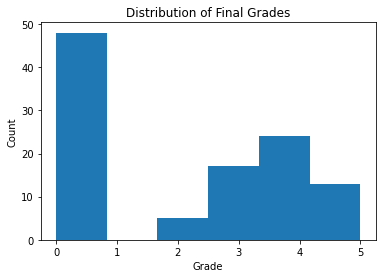

In [73]:
std.head(20)
import matplotlib.pyplot as plt
# Histogram of grades
plt.hist(std['Grade'], bins = 6)
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Distribution of Final Grades')

print(std.corr()['Grade'].sort_values())

In [74]:
from sklearn.model_selection import train_test_split

# X=std[['OverallStat', 'Week7_MP3', 'Week5_MP2', 'Week5_Stat2']]  # Features
X = std
y=std['Grade']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [75]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [76]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8787878787878788
